In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
import matplotlib.pyplot as plt

# MNIST 데이터 읽어 들이기 --- (※1)
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [3]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


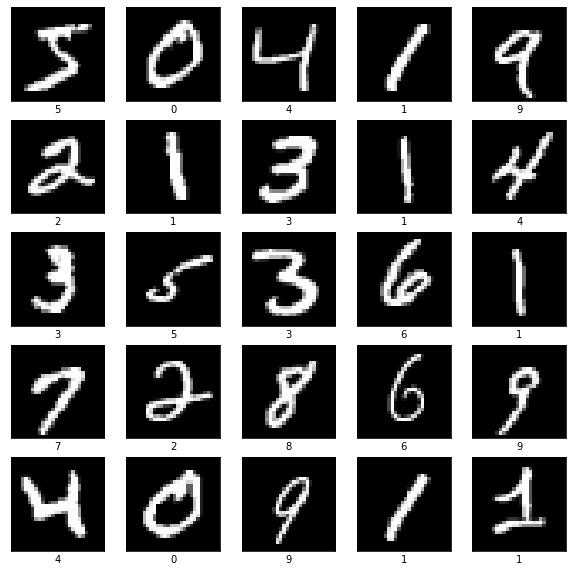

In [4]:
plt.figure(figsize=(10,10))
for index in range(25):
    plt.subplot(5, 5, index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[index], cmap='gray')
    plt.xlabel(str(y_train[index]))
plt.show()


In [5]:
# 데이터를 float32 자료형으로 변홖하고 정규화하기 --- (※2)
X_train = X_train.reshape(60000, 784).astype('float32') # 28, 28 = 784
X_test = X_test.reshape(10000, 784).astype('float32')

X_train /= 255
X_test /= 255

# 레이블 데이터를 0-9까지의 카테고리를 나타내는 배열로 변홖하기 --- (※2a)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [9]:
# 모델 구조 정의하기 --- (※3)
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [7]:
# 데이터 훈련하기 --- (※5)
hist = model.fit(X_train, y_train, epochs=5) # batch_size=32 Epoch 1/5 1875/1875 (train data size / batch_size) = 1875

Epoch 1/5
1875/1875 [==============================] - 13s 2ms/step - loss: 0.3576 - accuracy: 0.8893
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1076 - accuracy: 0.9664
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0740 - accuracy: 0.9768
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0625 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0546 - accuracy: 0.9829


In [8]:
# 테스트 데이터로 평가하기 --- (※6)
score = model.evaluate(X_test, y_test, verbose=1)
print('loss=', score[0])
print('accuracy=', score[1])

313/313 [==============================] - 0s 577us/step - loss: 0.0720 - accuracy: 0.9800
loss= 0.07203947007656097
accuracy= 0.9800000190734863


# Keras, BMI 

In [11]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping
import pandas as pd, numpy as np

In [13]:
# BMI 데이터를 읽어 들이고 정규화하기 --- (※1)
csv = pd.read_csv("../bmi.csv")

# 몸무게와 키 데이터
csv["weight"] /= 100
csv["height"] /= 200

In [14]:
X = csv[["weight", "height"]].to_numpy()

# 레이블
bclass = {"thin":[1,0,0], "normal":[0,1,0], "fat":[0,0,1]}
y = np.empty((20000, 3))
for i, v in enumerate(csv["label"]):
    y[i] = bclass[v]

# 훈련 전용 데이터와 테스트 전용 데이터로 나누기 --- (※2)
X_train, y_train = X[1:15001], y[1:15001]
X_test, y_test = X[15001:20001], y[15001:20001]


In [28]:
# 모델 구조 정의하기 --- (※3)
model = Sequential()
model.add(Dense(512, input_shape=(2,)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(3))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               1536      
_________________________________________________________________
activation_9 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_10 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 3)                

In [16]:
# 모델 구축하기 --- (※4)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [17]:
# 데이터 훈련하기 --- (※5)
hist = model.fit(X_train, y_train, batch_size=100, epochs=20)


Epoch 1/20
150/150 [==============================] - 1s 2ms/step - loss: 0.7034 - accuracy: 0.6999
Epoch 2/20
150/150 [==============================] - 0s 2ms/step - loss: 0.1663 - accuracy: 0.9511
Epoch 3/20
150/150 [==============================] - 0s 2ms/step - loss: 0.1141 - accuracy: 0.9588
Epoch 4/20
150/150 [==============================] - 0s 2ms/step - loss: 0.0897 - accuracy: 0.9685
Epoch 5/20
150/150 [==============================] - 0s 2ms/step - loss: 0.0824 - accuracy: 0.9682
Epoch 6/20
150/150 [==============================] - 0s 2ms/step - loss: 0.0730 - accuracy: 0.9740
Epoch 7/20
150/150 [==============================] - 0s 2ms/step - loss: 0.0709 - accuracy: 0.9690
Epoch 8/20
150/150 [==============================] - 0s 2ms/step - loss: 0.0705 - accuracy: 0.9713
Epoch 9/20
150/150 [==============================] - 0s 2ms/step - loss: 0.0643 - accuracy: 0.9728
Epoch 10/20
150/150 [==============================] - 0s 2ms/step - loss: 0.0703 - accuracy: 0.9698

# tensorflow.keras 

In [29]:
import tensorflow as tf

print(tf.__version__)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

model = tf.keras.Sequential(layers=[tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(128, activation="relu"),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation="softmax")])
model.summary()

2.5.0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy", # sparse_categorical_crossentropy , categorical_crossentropy
              metrics=["accuracy"])


In [34]:
history = model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 1s 570us/step - loss: 0.4035 - accuracy: 0.9037
Epoch 2/5
1875/1875 [==============================] - 1s 560us/step - loss: 0.3621 - accuracy: 0.9089
Epoch 3/5
1875/1875 [==============================] - 1s 569us/step - loss: 0.3579 - accuracy: 0.9107
Epoch 4/5
1875/1875 [==============================] - 1s 558us/step - loss: 0.3413 - accuracy: 0.9145
Epoch 5/5
1875/1875 [==============================] - 1s 569us/step - loss: 0.3373 - accuracy: 0.9164


In [31]:
# 케라스 모델의 정확도는 evaluate 메서드를 이용해서 확인
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\n테스트 정확도 :", test_acc)


313/313 - 0s - loss: 0.3070 - accuracy: 0.9298

테스트 정확도 : 0.9297999739646912


예측값:7, 실제값:7


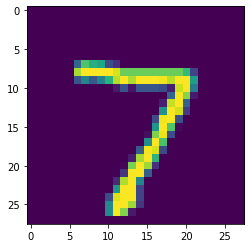

In [32]:
import matplotlib.pyplot as plt
import numpy as np

predictions = model.predict(x_test)
pred = np.argmax(predictions[0])
print("예측값:{}, 실제값:{}".format(pred, y_test[0]))
plt.imshow(x_test[0])
plt.show()

In [35]:
# history 객체는 모델이 매 epochs 마다 측정핚 비용(loss)와 정확도를 기록핚다.
history.history


{'loss': [0.40349870920181274,
  0.3620576560497284,
  0.35790497064590454,
  0.34132689237594604,
  0.3372741639614105],
 'accuracy': [0.9037333130836487,
  0.9089499711990356,
  0.9107000231742859,
  0.9144833087921143,
  0.9164166450500488]}

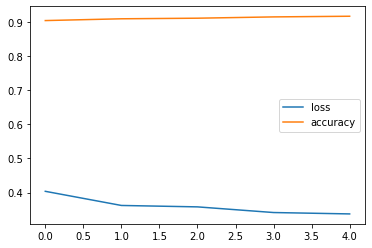

In [36]:
plt.plot(history.history["loss"])
plt.plot(history.history["accuracy"])
plt.legend(["loss", "accuracy"])
plt.show()


# tf.keras 기본 이미지 분류 예제

In [37]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
# 패션 MNIST 데이터셋 임포트
fashion_mnist = keras.datasets.fashion_mnist
# train_images와 train_labels 배열은 모델 학습에 사용되는 훈련 세트
# test_images와 test_labels 배열은 모델 테스트에 사용되는 테스트 세트
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


- 이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이다. 레이블(label)은 0에서 9까지의
정수 배열이며 이미지에 있는 옷의 클래스(class)를 나타낸다.
- 레이블:클래스는 다음과 같다.
 0: T-shirt/top 1 : Trouser 2 : Pullover 3 : Dress 4 : Coat 5 : Sandal 6 : Shirt 7 : Sneaker 8 : Bag 
 9 : Ankle boot

In [38]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 데이터셋 구조 : 훈련 세트에 60,000개의 이미지, 각 이미지는 28x28 픽셀로 표현
# 각 레이블은 0과 9사이의 정수
# 테스트 세트에는 10,000개의 이미지가 있으며 28x28 픽셀로 표현
print(f"train_image.shape:{train_images.shape},train_labels:{train_labels},test_:{test_images.shape},test_:{len(test_labels)}")


train_image.shape:(60000, 28, 28),train_labels:[9 0 0 ... 3 0 5],test_i_s:(10000, 28, 28),test_l_l:10000


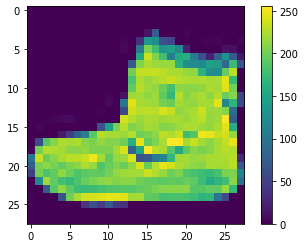

In [39]:
### 데이터 전처리 : 훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0~255 사이라는 것 확인
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [40]:
# 신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정
train_images = train_images / 255.0
test_images = test_images / 255.0


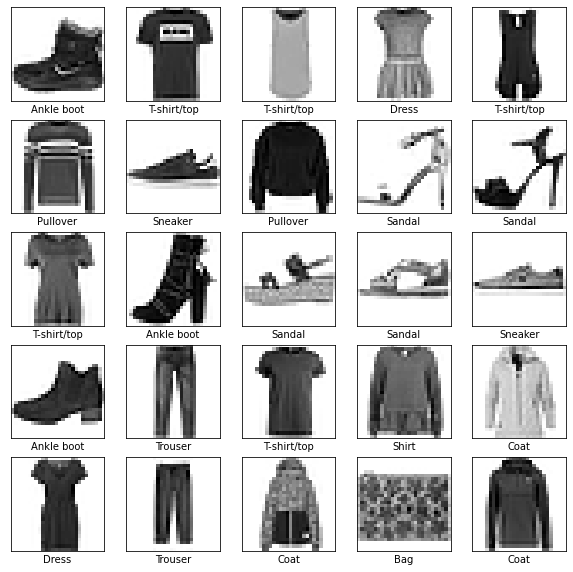

In [41]:
# 훈련 세트에서 처음 25개 이미지와 그 아래 클래스 이름을 출력
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [60]:
# 모델 구성
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import Sequential

model = Sequential([Flatten(input_shape=(28, 28)),
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax')])
# model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
#                           keras.layers.Dense(128, activation='relu'),
#                           keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [46]:
# 모델 훈련
history = model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 1s 531us/step - loss: 0.2012 - accuracy: 0.9247
Epoch 2/5
1875/1875 [==============================] - 1s 527us/step - loss: 0.1942 - accuracy: 0.9274
Epoch 3/5
1875/1875 [==============================] - 1s 532us/step - loss: 0.1878 - accuracy: 0.9296
Epoch 4/5
1875/1875 [==============================] - 1s 525us/step - loss: 0.1845 - accuracy: 0.9310
Epoch 5/5
1875/1875 [==============================] - 1s 535us/step - loss: 0.1801 - accuracy: 0.9317


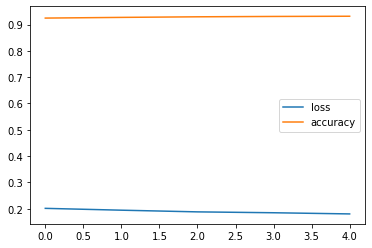

In [47]:
# 손실과 정확도 그래프로 확인
plt.plot(history.history["loss"])
plt.plot(history.history["accuracy"])
plt.legend(["loss", "accuracy"])
plt.show()


In [48]:
# 정확도 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\n테스트 정확도: {test_acc}')

313/313 - 0s - loss: 0.3494 - accuracy: 0.8896

테스트 정확도: 0.8895999789237976


In [49]:
# 예측 만들기
predictions = model.predict(test_images)

In [50]:
# 첫 번째 예측 확인
# 이 값은 10개의 옷 품목에 상응하는 모델의 신뢰도(confidence)를 나타낸다.
predictions[0]


array([3.0020768e-08, 2.8203441e-13, 1.1099962e-12, 1.8967536e-09,
       4.4470023e-14, 1.2597511e-06, 6.9218548e-10, 3.8743133e-03,
       8.6881515e-09, 9.9612445e-01], dtype=float32)

In [51]:
# 가장 높은 신뢰도를 가진 레이블
np.argmax(predictions[0])


9

In [52]:
# 10개 클래스에 대핚 예측을 모두 그래프로 표현
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    #plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)
    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})", color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


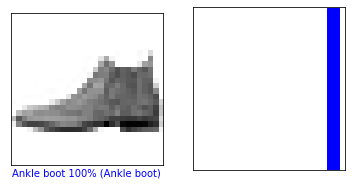

In [53]:
# 0번째 원소의 이미지, 예측, 신뢰도 점수 배열 확인
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()


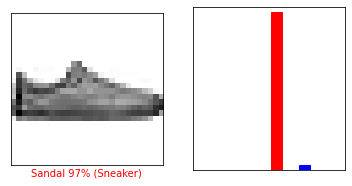

In [54]:
# 12번째 원소의 이미지, 예측, 신뢰도 점수 배열 확인
# 올바르게 예측된 레이블은 파란색이고 잘못 예측된 레이블은 빨강색
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()


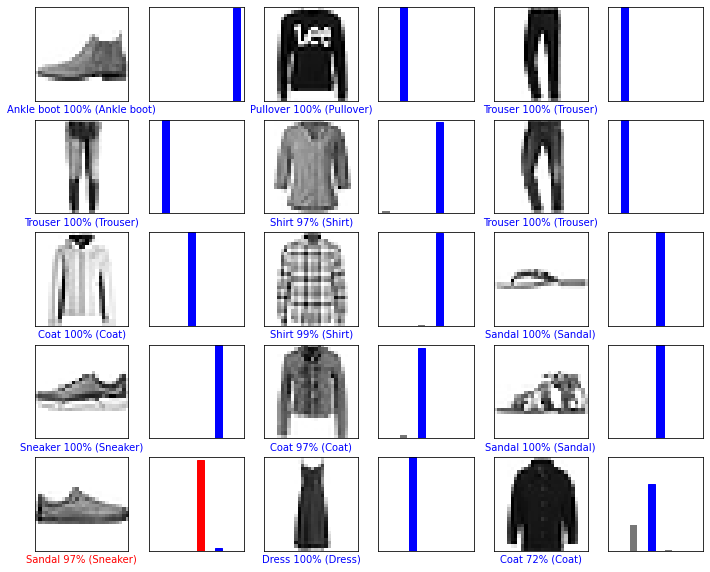

In [55]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력핚다.
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타낸다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [56]:
# 테스트 세트에서 이미지 하나를 선택핚다
img = test_images[0]
print(img.shape)

img = (np.expand_dims(img,0))
print(img.shape)


(28, 28)
(1, 28, 28)


In [57]:
# 이 이미지의 예측 생성
predictions_single = model.predict(img)
print(predictions_single)

[[3.0020711e-08 2.8203386e-13 1.1099984e-12 1.8967465e-09 4.4469938e-14
  1.2597536e-06 6.9218548e-10 3.8743152e-03 8.6881675e-09 9.9612445e-01]]


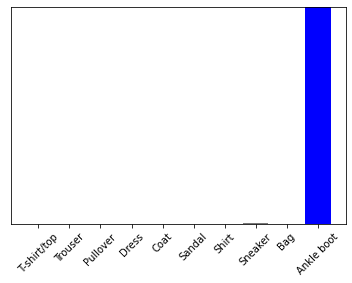

In [58]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [59]:
# model.predict는 2차원 넘파이 배열을 반홖하므로 첫 번째 이미지의 예측 선택
np.argmax(predictions_single[0])

9